In [117]:
'''
This is Homework 2 for AMATH 581
Tianbo Zhang 1938501
'''
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [118]:
L = 4
xspan = np.arange(-L, L+0.1, 0.1)
K = 1
epsilon_start = 0
tol = 1e-5
A = 1
A1 = []
A2 = []

In [119]:
def shoot(phi, x, K, epsilon):
    return [phi[1], (K * x**2 - epsilon) * phi[0]]

def normalize(phi):
    norm = np.sqrt(np.trapz(phi[:, 0] * phi[:, 0], xspan))
    return abs(phi[:, 0]/norm)

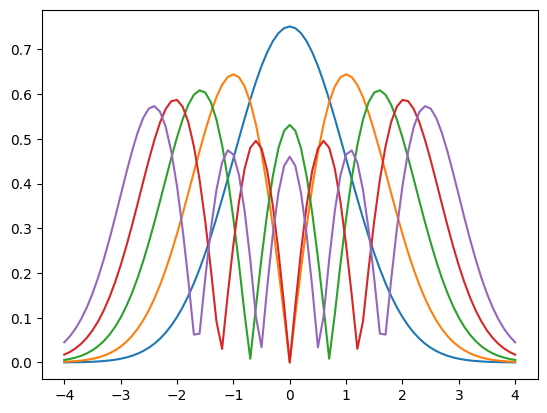

In [120]:
for modes in range(1, 6):
    epsilon = epsilon_start
    depsilon = 0.1
    for i in range(1000):
        phi0 = [A, A*np.sqrt(A*L*L - epsilon)]
        phi = odeint(shoot, phi0, xspan, args = (K, epsilon))
        temp = phi[-1, 1] + np.sqrt(K*L*L - epsilon)*phi[-1, 0]
        if np.abs(temp) < tol:
            eigfunc = normalize(phi)
            A1.append(eigfunc)
            A2.append(epsilon)
            break
        if (-1) ** (modes + 1) * temp > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2
    epsilon_start = epsilon + 0.1
    plt.plot(xspan, eigfunc)
A1 = np.transpose(np.array(A1))
A2 = np.array(A2)